In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import warnings 

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [15]:
# Importing and cleaning the data
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [16]:
X = breast_dataset.iloc[:,:30].values 
Y = breast_dataset.iloc[:, 30].values 

# Scaling the features
sc_X = StandardScaler() 
std_X = sc_X.fit_transform(X)

In [17]:
# Problem 1
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(std_X, Y, test_size = 0.20, random_state=0)

# Creating the logistic model and fitting it
classifier = LogisticRegression(random_state=42) 
classifier.fit(X_train, Y_train)

# Creating predictions with the test data
Y_pred = classifier.predict(X_test)

# Computing the metrics for the model
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


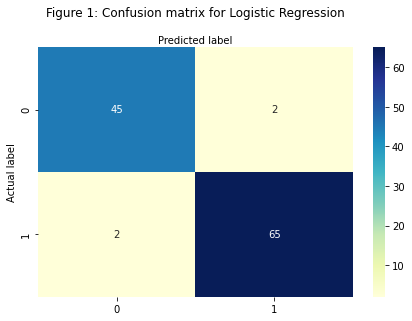

In [18]:
# Confusion matrix
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 1: Confusion matrix for Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

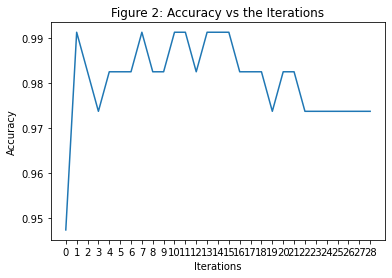

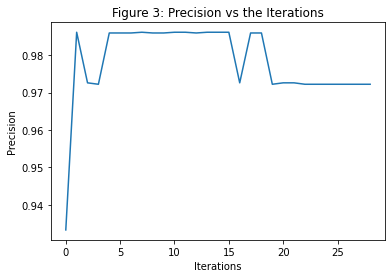

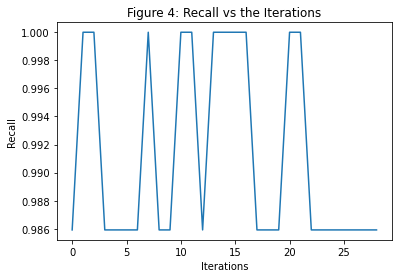

In [19]:
# Problem 2 - Feature extraction using PCA
# Scaling the features
accuracy = []
precision = []
recall = []

for i in range(29):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the logistic model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.20, random_state=42)
    classifier = classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, Y_train)

    # Creating predictions with the test data
    Y_pred = classifier.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

# Plotting the accuracy, precision, and recall against the iterations
plt.figure()
plt.plot(range(29),accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Figure 2: Accuracy vs the Iterations')
plt.xticks(range(29))
plt.show()

plt.figure()
plt.plot(range(29),precision)
plt.xlabel('Iterations')
plt.ylabel('Precision')
plt.title('Figure 3: Precision vs the Iterations')
plt.show()

plt.figure()
plt.plot(range(29),recall)
plt.xlabel('Iterations')
plt.ylabel('Recall')
plt.title('Figure 4: Recall vs the Iterations')
plt.show()
#Explain that there is no 0 value in here and so the graph starts at iteration 0 and that is why the the graph does not show 0 on the y axis. You can more easily see the results by not showing iteration 0

In [20]:
# Problem 3 - Feature extraction using LDA and Niave Bayes
lda = LDA(n_components=1)
lda_t = lda.fit_transform(X,Y)

In [21]:
# Creating the Naive Bayes model and fitting it
X_train, X_test, Y_train, Y_test = train_test_split(lda_t, Y, test_size = 0.20, random_state=0)
lda.fit(X_train,Y_train)

#Creating predictions with the test data
Y_pred = lda.predict(X_test)

# Computing the metrics for the model
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9824561403508771
Precision: 0.9710144927536232
Recall: 1.0


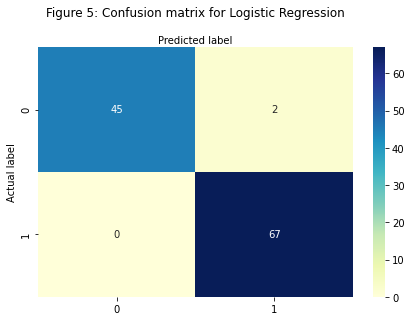

In [22]:
# Confusion matrix
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 5: Confusion matrix for Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');

In [23]:
# Problem 4 - Feature extraction using LDA and Logistics Regression
lda = LDA(n_components=1)
lda_t = lda.fit_transform(X,Y)

In [24]:
# Splitting the data and fitting the model
X_train, X_test, Y_train, Y_test = train_test_split(lda_t, Y, test_size = 0.20, random_state=0)
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)


#Creating predictions with the test data
Y_pred = classifier.predict(X_test)

# Computing the metrics for the model
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716


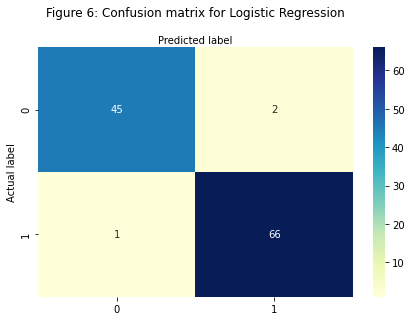

In [25]:
# Confusion matrix
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Figure 6: Confusion matrix for Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label');